In [812]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings

warnings.filterwarnings('ignore')

In [813]:
train_data = pd.read_excel('Data_Train.xlsx')
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [814]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [815]:
test = pd.read_excel('Test_set.xlsx')

In [816]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [817]:
test.shape

(2671, 10)

In [818]:
train = train_data.append(test,sort = False)
train.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0  
1    05:50         13:15   7h 25m     2 stops         No info   7662.0  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0  
3    18:05         23:30   5h 25m      1 stop         No info   6218.0  
4    16:50         21:35   4h 45m      1 stop         No info  13302.0

In [819]:
import pandas_profiling as pp

In [820]:
pp.ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [821]:
train.shape

(13354, 11)

In [822]:
train.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [823]:
train=train.dropna()

In [824]:
train['Date_of_Journey']  =  pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y')

In [825]:
train['Date_of_Journey']

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
5       2019-06-24
6       2019-03-12
7       2019-03-01
8       2019-03-12
9       2019-05-27
10      2019-06-01
11      2019-04-18
12      2019-06-24
13      2019-05-09
14      2019-04-24
15      2019-03-03
16      2019-04-15
17      2019-06-12
18      2019-06-12
19      2019-05-27
20      2019-03-06
21      2019-03-21
22      2019-04-03
23      2019-05-01
24      2019-05-06
25      2019-06-09
26      2019-06-01
27      2019-05-15
28      2019-06-18
29      2019-06-15
30      2019-06-18
31      2019-05-01
32      2019-04-06
33      2019-06-15
34      2019-05-18
35      2019-06-27
36      2019-05-21
37      2019-05-18
38      2019-03-06
39      2019-06-03
40      2019-05-21
41      2019-03-15
42      2019-05-18
43      2019-05-06
44      2019-03-21
45      2019-03-24
46      2019-05-27
47      2019-05-03
48      2019-05-15
49      2019-06-27
50      2019-03-09
51      2019-05-01
52      2019

In [826]:
train['Journey_day']      =  train['Date_of_Journey'].dt.day
train['Dep_day']          =  train['Date_of_Journey'].dt.dayofweek
train['Dep_month']        =  train['Date_of_Journey'].dt.month

In [827]:
train['Dep_month']    =  train['Dep_month'].replace({1:'Jan', 2:'Feb',    3:'Mar',  4:'April',   5:'May', 6:'June', 
7:'July',8:'August', 9:'Sept', 10:'Oct',   11:'Nov', 12:'Dec'})

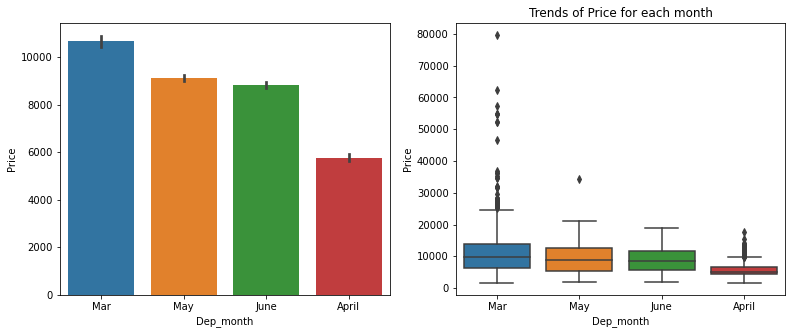

In [838]:
f, axes = plt.subplots(1, 2,figsize=(13,5))
sns.barplot(train['Dep_month'],train['Price'], ax =axes[0])
plt.title('Trends of Price for each month')
sns.boxplot(train['Dep_month'],train['Price'], ax =axes[1])
plt.title('Trends of Price for each month')
plt.show()

In [713]:
train['Dep_day']      =  train['Dep_day'].replace({0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'})

Text(0.5, 1.0, 'Trends of Price for each day of week')

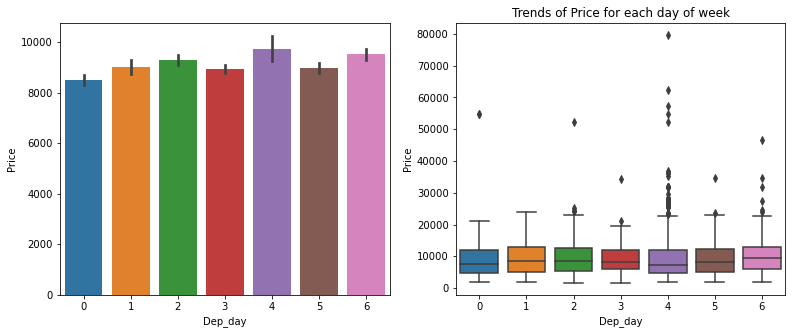

In [839]:
f, axes = plt.subplots(1, 2,figsize=(13,5))
sns.barplot(train['Dep_day'],train['Price'], ax =axes[0])
sns.boxplot(train['Dep_day'],train['Price'], ax =axes[1])
plt.title('Trends of Price for each day of week')

Text(0.5, 1.0, 'Source vs Count of flight')

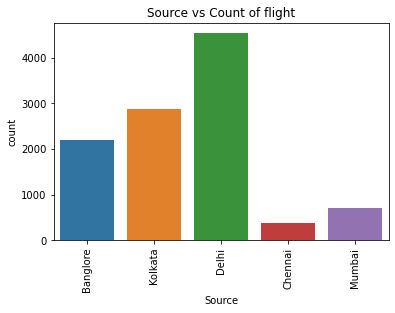

In [840]:
plot=plt.figure()
sns.countplot('Source',data=train)
plt.xticks(rotation=90)
plt.title('Source vs Count of flight')

Text(0.5, 1.0, 'Destination vs Count of flight')

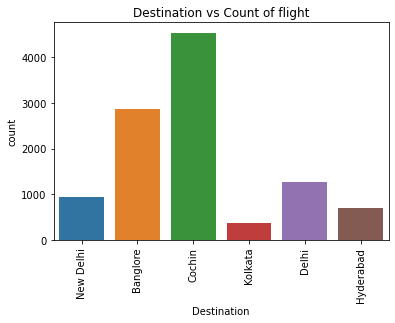

In [841]:
plot=plt.figure()
sns.countplot('Destination',data=train)
plt.xticks(rotation=90)
plt.title('Destination vs Count of flight')

In [843]:
train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [844]:
train['Dep_Time']  =  pd.to_datetime(train['Dep_Time']).dt.time
train['Dep_hr']  =  train['Dep_Time'].apply(lambda x:x.hour)

In [845]:
train['Duration_mins']  =  train['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
train['Duration']       =  train['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [846]:
train.drop('Duration',axis=1,inplace=True)

In [847]:
def pod(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [848]:
train['Dep_Part_of_day']=train['Dep_hr'].apply(pod)
train.drop(['Dep_Time','Dep_hr'],axis=1,inplace=True)

Text(0.5, 1.0, 'Trends of price based on various times in a day during departure')

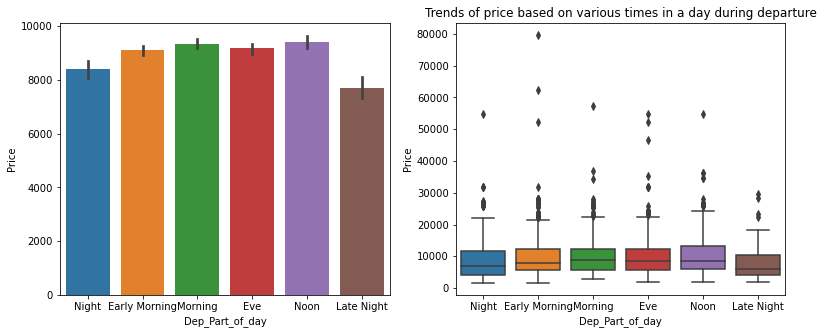

In [850]:
f, axes = plt.subplots(1, 2,figsize=(13,5))
sns.barplot(train['Dep_Part_of_day'],train['Price'], ax =axes[0])
sns.boxplot(train['Dep_Part_of_day'],train['Price'], ax =axes[1])
plt.title('Trends of price based on various times in a day during departure')

In [852]:
train['Arrival_Time'] =  pd.to_datetime(train['Arrival_Time']).dt.time
train['Arrival_hr'] = train['Arrival_Time'].apply(lambda x :x.hour)

In [853]:
def pod(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [854]:
train['Arrival_Part_of_day']=train['Arrival_hr'].apply(pod)
train.drop(['Arrival_Time','Arrival_hr'],axis=1,inplace=True)

Text(0.5, 1.0, 'Trends of price based on various times in a day during arrival')

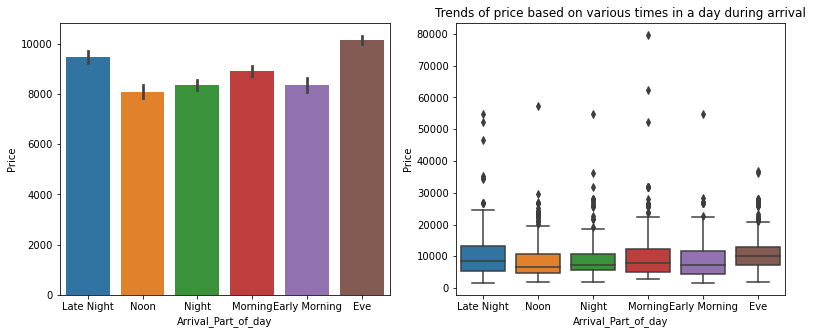

In [855]:
f, axes = plt.subplots(1, 2,figsize=(13,5))
sns.barplot(train['Arrival_Part_of_day'],train['Price'], ax =axes[0])
sns.boxplot(train['Arrival_Part_of_day'],train['Price'], ax =axes[1])
plt.title('Trends of price based on various times in a day during arrival')

Text(0.5, 1.0, 'Source vs Price')

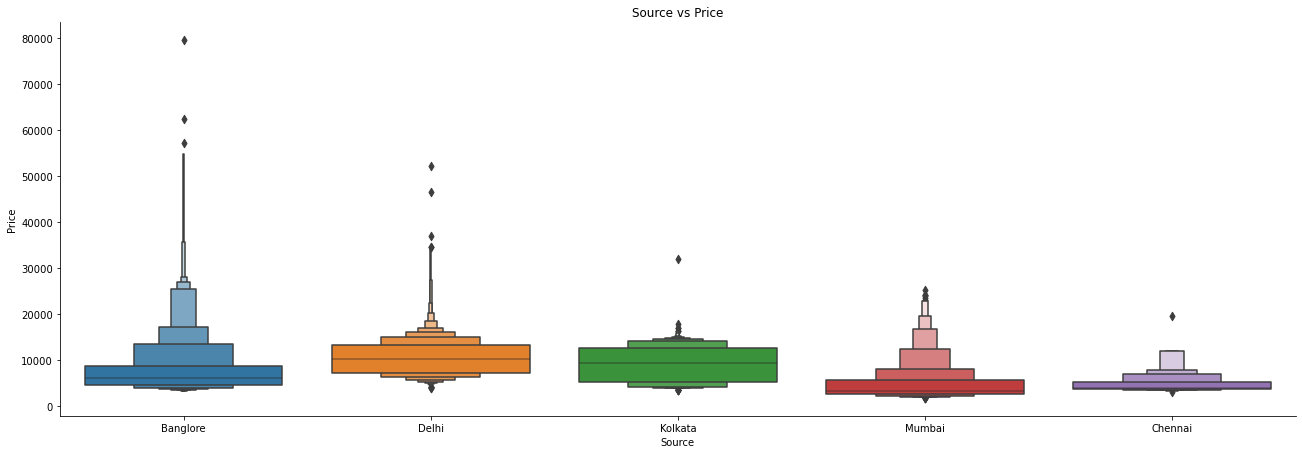

In [857]:
sns.catplot(y='Price',x='Source',data= train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show
plt.title('Source vs Price')

Text(0.5, 1.0, 'Airline vs Count of flights')

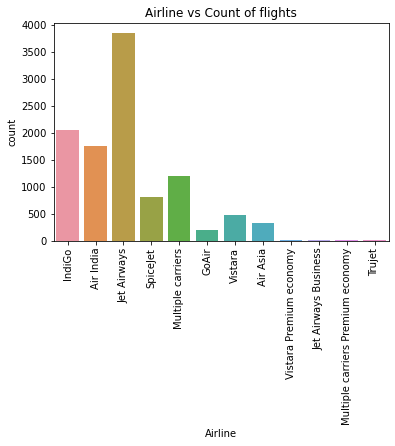

In [858]:
plt.showplot=plt.figure()
sns.countplot('Airline',data=train)
plt.xticks(rotation=90)
plt.title('Airline vs Count of flights')

In [730]:
train['Mean_Route'] = train['Route'].replace(dict(train.groupby(['Route'])['Price'].mean()))

In [731]:
train['Mean_Route']

0         5561.114691
1         7369.166667
2        13277.195122
3         6279.333333
4        11313.000000
5         4556.055249
6        15723.174129
7        15723.174129
8        15723.174129
9        10954.205808
10        7559.612069
11        4556.055249
12        4789.892388
13       11487.788560
14        4556.055249
15       12740.360976
16        6602.071429
17       10954.205808
18       13962.431818
19       10954.205808
20       10954.205808
21        9139.133333
22        5561.114691
23        5561.114691
24       11487.788560
25       13931.616162
26        7166.176471
27       10954.205808
28        5561.114691
29        4789.892388
30        4789.892388
31       13875.000000
32        5561.114691
33       12317.929577
34       10954.205808
35       10954.205808
36        5240.876923
37        4556.055249
38       15723.174129
39       10954.205808
40        7299.331288
41       15723.174129
42       10954.205808
43        5561.114691
44       10954.205808
45        

In [732]:
train['Total_Stops']=train['Total_Stops'].replace({'non-stop': 0,
                                                   '1 stop'  : 1,
                                                   '2 stops' : 2,
                                                   '3 stops' : 3,
                                                   '4 stops' : 4})

Text(0.5, 1.0, 'Trends of price based on number of stops')

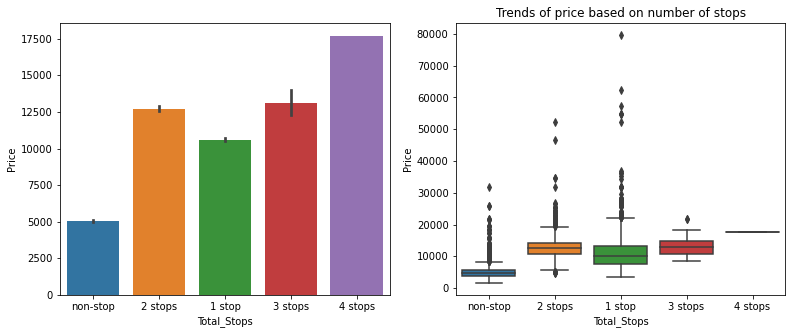

In [859]:
f, axes = plt.subplots(1, 2,figsize=(13,5))
sns.barplot(train['Total_Stops'],train['Price'], ax =axes[0])
sns.boxplot(train['Total_Stops'],train['Price'], ax =axes[1])
plt.title('Trends of price based on number of stops')

In [734]:
train['Flight_name']   =  train['Source'] +  '-'  +  train['Destination']

In [735]:
train['Flight_name']

0        Banglore-New Delhi
1          Kolkata-Banglore
2              Delhi-Cochin
3          Kolkata-Banglore
4        Banglore-New Delhi
5          Kolkata-Banglore
6        Banglore-New Delhi
7        Banglore-New Delhi
8        Banglore-New Delhi
9              Delhi-Cochin
10             Delhi-Cochin
11         Kolkata-Banglore
12          Chennai-Kolkata
13         Kolkata-Banglore
14         Kolkata-Banglore
15             Delhi-Cochin
16             Delhi-Cochin
17             Delhi-Cochin
18             Delhi-Cochin
19             Delhi-Cochin
20             Delhi-Cochin
21       Banglore-New Delhi
22           Banglore-Delhi
23           Banglore-Delhi
24         Kolkata-Banglore
25             Delhi-Cochin
26             Delhi-Cochin
27             Delhi-Cochin
28           Banglore-Delhi
29          Chennai-Kolkata
30          Chennai-Kolkata
31         Kolkata-Banglore
32           Banglore-Delhi
33             Delhi-Cochin
34             Delhi-Cochin
35             Delhi

In [736]:
train['Flight_Stops']= train['Flight_name'] + train['Total_Stops'].astype(str)

In [737]:
train['Flight_Stops']

0        Banglore-New Delhi0
1          Kolkata-Banglore2
2              Delhi-Cochin2
3          Kolkata-Banglore1
4        Banglore-New Delhi1
5          Kolkata-Banglore0
6        Banglore-New Delhi1
7        Banglore-New Delhi1
8        Banglore-New Delhi1
9              Delhi-Cochin1
10             Delhi-Cochin1
11         Kolkata-Banglore0
12          Chennai-Kolkata0
13         Kolkata-Banglore1
14         Kolkata-Banglore0
15             Delhi-Cochin2
16             Delhi-Cochin1
17             Delhi-Cochin1
18             Delhi-Cochin2
19             Delhi-Cochin1
20             Delhi-Cochin1
21       Banglore-New Delhi1
22           Banglore-Delhi0
23           Banglore-Delhi0
24         Kolkata-Banglore1
25             Delhi-Cochin2
26             Delhi-Cochin1
27             Delhi-Cochin1
28           Banglore-Delhi0
29          Chennai-Kolkata0
30          Chennai-Kolkata0
31         Kolkata-Banglore2
32           Banglore-Delhi0
33             Delhi-Cochin2
34            

In [738]:
train['Flight_Stops']= train['Airline'] + '/' + train['Flight_name'] + train['Total_Stops'].astype(str)
train['Flight_Stops']

0                             IndiGo/Banglore-New Delhi0
1                            Air India/Kolkata-Banglore2
2                              Jet Airways/Delhi-Cochin2
3                               IndiGo/Kolkata-Banglore1
4                             IndiGo/Banglore-New Delhi1
5                             SpiceJet/Kolkata-Banglore0
6                        Jet Airways/Banglore-New Delhi1
7                        Jet Airways/Banglore-New Delhi1
8                        Jet Airways/Banglore-New Delhi1
9                        Multiple carriers/Delhi-Cochin1
10                               Air India/Delhi-Cochin1
11                              IndiGo/Kolkata-Banglore0
12                            Air India/Chennai-Kolkata0
13                         Jet Airways/Kolkata-Banglore1
14                              IndiGo/Kolkata-Banglore0
15                               Air India/Delhi-Cochin2
16                                SpiceJet/Delhi-Cochin1
17                             

In [739]:
train['Mean_Flight_Stops']=train['Flight_Stops'].replace(dict(train.groupby(['Flight_Stops'])['Price'].mean()))
train['Mean_Flight_Stops']

0         7121.948718
1        12261.312500
2        13291.973412
3         5730.225806
4         7871.150000
5         4037.822581
6        15263.692308
7        15263.692308
8        15263.692308
9        10711.316157
10        8911.313167
11        4818.215625
12        5895.640000
13       11722.675719
14        4818.215625
15       11587.761394
16        5916.356322
17       12332.048000
18       11587.761394
19       12332.048000
20        6587.157895
21       10099.159574
22        4399.581967
23        4399.581967
24       11722.675719
25       13291.973412
26        7326.378981
27        6587.157895
28        5042.312977
29        7491.372093
30        7491.372093
31       12261.312500
32        4399.581967
33       13291.973412
34       12332.048000
35        7326.378981
36        7528.557692
37        5554.622951
38       15263.692308
39       12332.048000
40       10711.316157
41       10099.159574
42       12332.048000
43        4265.577465
44       10711.316157
45        

In [740]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Flight_Stops'] = le.fit_transform(train['Flight_Stops'])

In [741]:
train.drop('Route',axis=1,inplace=True)

In [742]:
train.drop(['Additional_Info'],axis=1,inplace=True)

In [743]:
airline=pd.get_dummies(train['Airline'],drop_first=True)
train.drop(['Airline'],axis=1,inplace=True)
airline.head()

Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       1            0                     0   
1          1      0       0            0                     0   
2          0      0       0            1                     0   
3          0      0       1            0                     0   
4          0      0       1            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  0                                  0         0       0   
1                  0                                  0         0       0   
2                  0                                  0         0       0   
3                  0                                  0         0       0   
4                  0                                  0         0       0   

   Vistara  Vistara Premium economy  
0        0                        0  
1        0                        0  
2        0                        0  
3        0                        0  
4        0                        0

In [744]:
source=pd.get_dummies(train['Source'])
train.drop(['Source'],axis=1,inplace=True)
source.head()

Banglore  Chennai  Delhi  Kolkata  Mumbai
0         1        0      0        0       0
1         0        0      0        1       0
2         0        0      1        0       0
3         0        0      0        1       0
4         1        0      0        0       0

In [745]:
destination=pd.get_dummies(train['Destination'])
train.drop(['Destination'],axis=1,inplace=True)
destination.head()

Banglore  Cochin  Delhi  Hyderabad  Kolkata  New Delhi
0         0       0      0          0        0          1
1         1       0      0          0        0          0
2         0       1      0          0        0          0
3         1       0      0          0        0          0
4         0       0      0          0        0          1

In [746]:
dep_day=pd.get_dummies(train['Dep_day'])
train.drop(['Dep_day'],axis=1,inplace=True)

dep_day.head()

Fri  Mon  Sat  Sun  Thur  Tue  Wed
0    0    0    0    1     0    0    0
1    0    0    0    0     0    0    1
2    0    0    0    1     0    0    0
3    0    0    0    1     0    0    0
4    1    0    0    0     0    0    0

In [747]:
dep_month=pd.get_dummies(train['Dep_month'])
train.drop(['Dep_month'],axis=1,inplace=True)

dep_month.head()

April  June  Mar  May
0      0     0    1    0
1      0     0    0    1
2      0     1    0    0
3      0     0    0    1
4      0     0    1    0

In [748]:
dep_pod=pd.get_dummies(train['Dep_Part_of_day'])
train.drop(['Dep_Part_of_day'],axis=1,inplace=True)

dep_pod.head()

Early Morning  Eve  Late Night  Morning  Night  Noon
0              0    0           0        0      1     0
1              1    0           0        0      0     0
2              0    0           0        1      0     0
3              0    1           0        0      0     0
4              0    0           0        0      0     1

In [749]:
arr_pod=pd.get_dummies(train['Arrival_Part_of_day'])
train.drop(['Arrival_Part_of_day'],axis=1,inplace=True)
arr_pod.columns = ['earlymor_arr','eve_arr','late_night_arr','morn_arr','night_arr','noon_arr']


arr_pod.head()

earlymor_arr  eve_arr  late_night_arr  morn_arr  night_arr  noon_arr
0             0        0               1         0          0         0
1             0        0               0         0          0         1
2             0        0               1         0          0         0
3             0        0               0         0          1         0
4             0        0               0         0          1         0

In [750]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Flight_name'] = le.fit_transform(train['Flight_name'])

In [751]:
final_train=pd.concat([train,airline,source,destination,dep_day,dep_month,dep_pod,arr_pod],axis=1)
final_train = final_train.drop('Flight_Stops',axis=1)

In [752]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
final_train['Journey_day'] = std.fit_transform(final_train[['Journey_day']])
final_train['Duration_mins'] = std.fit_transform(final_train[['Duration_mins']])

In [753]:
final_train.head(4)

Total_Stops    Price  Journey_day  Duration_mins    Mean_Route  \
0            0   3897.0     1.237288      -0.931498   5561.114691   
1            2   7662.0    -1.475307      -0.389953   7369.166667   
2            2  13882.0    -0.531796       0.978679  13277.195122   
3            1   6218.0    -0.177979      -0.626263   6279.333333   

   Flight_name  Mean_Flight_Stops  Air India  GoAir  IndiGo  Jet Airways  \
0            1        7121.948718          0      0       1            0   
1            4       12261.312500          1      0       0            0   
2            3       13291.973412          0      0       0            1   
3            4        5730.225806          0      0       1            0   

   Jet Airways Business  Multiple carriers  Multiple carriers Premium economy  \
0                     0                  0                                  0   
1                     0                  0                                  0   
2                     0                  0                                  0   
3                     0                  0                                  0   

   SpiceJet  Trujet  Vistara  Vistara Premium economy  Banglore  Chennai  \
0         0       0        0                        0         1        0   
1         0       0        0                        0         0        0   
2         0       0        0                        0         0        0   
3         0       0        0                        0         0        0   

   Delhi  Kolkata  Mumbai  Banglore  Cochin  Delhi  Hyderabad  Kolkata  \
0      0        0       0         0       0      0          0        0   
1      0        1       0         1       0      0          0        0   
2      1        0       0         0       1      0          0        0   
3      0        1       0         1       0      0          0        0   

   New Delhi  Fri  Mon  Sat  Sun  Thur  Tue  Wed  April  June  Mar  May  \
0          1    0    0    0    1     0    0    0      0     0    1    0   
1          0    0    0    0    0     0    0    1      0     0    0    1   
2          0    0    0    0    1     0    0    0      0     1    0    0   
3          0    0    0    0    1     0    0    0      0     0    0    1   

   Early Morning  Eve  Late Night  Morning  Night  Noon  earlymor_arr  \
0              0    0           0        0      1     0             0   
1              1    0           0        0      0     0             0   
2              0    0           0        1      0     0             0   
3              0    1           0        0      0     0             0   

   eve_arr  late_night_arr  morn_arr  night_arr  noon_arr  
0        0               1         0          0         0  
1        0               0         0          0         1  
2        0               1         0          0         0  
3        0               0         0          1         0

In [754]:
t = final_train[['Total_Stops','Journey_day','Duration_mins','Mean_Route','Flight_name','Mean_Flight_Stops']]
A = final_train['Price']

In [755]:
X = final_train.drop(['Price'],axis=1)
y = final_train['Price']

In [756]:
from sklearn.feature_selection import mutual_info_classif
feat_imp = pd.DataFrame(mutual_info_classif(t,A),index=t.columns)

0
Total_Stops        2.173793
Journey_day        0.876040
Duration_mins      2.385805
Mean_Route         3.426009
Flight_name        2.242346
Mean_Flight_Stops  3.940941

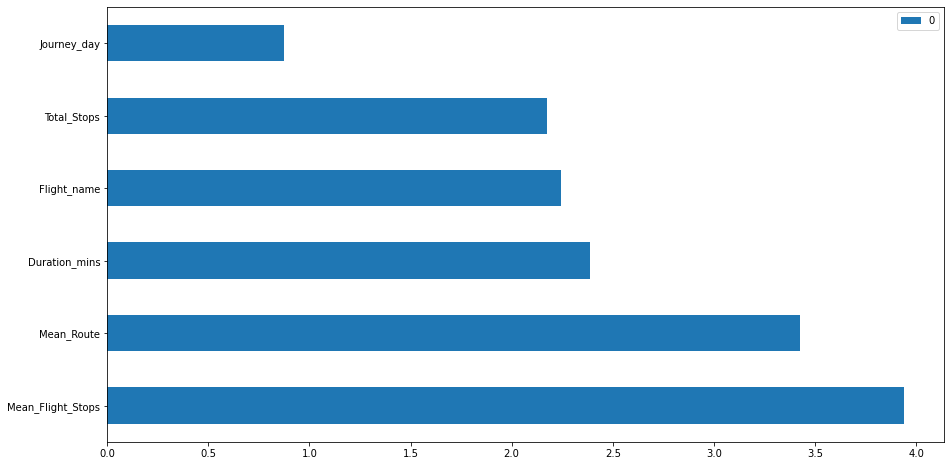

In [757]:
feat_imp.sort_values(by=0,ascending=False).plot(kind='barh',figsize=(15,8))
feat_imp

In [758]:
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Ridge,Lasso
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.tree            import DecisionTreeRegressor
from sklearn.ensemble        import GradientBoostingRegressor,RandomForestRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

In [759]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [792]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def model_predict(ml_model):
    print('Model used is     :  {}'.format(ml_model))
    print('\t')
    #Training Info
    model      = ml_model.fit(X_train,y_train)
    train_pred = ml_model.predict(X_train)
    
    print("Training R2 score :  {}".format(round(model.score(X_train,y_train),2)))
    print('Training MAE      :  {}'.format(round(mean_absolute_error(y_train,train_pred),2)))
    print('Training MSE      :  {}'.format(round(mean_squared_error(y_train,train_pred),2)))
    print('Training RMSE     :  {}'.format(np.sqrt(round(mean_squared_error(y_train,train_pred),2))))

    print('\t')
    
    #Test Info
    predictions = model.predict(X_test)
    r2score     = r2_score(y_test,predictions) 
    print("Test R2 score     :  {}".format(round(r2score,2)))
    print('Test MAE          :  {}'.format(round(mean_absolute_error(y_test,predictions),2)))
    print('Test MSE          :  {}'.format(round(mean_squared_error(y_test,predictions),2)))
    print('Test RMSE         :  {}'.format(np.sqrt(round(mean_squared_error(y_test,predictions),2))))
    print('Predictions:',predictions)
    
    sns.distplot(y_test-predictions)
    plt.show()

In [807]:
def model_prediction(ml_model):
    print('Model used is     :  {}'.format(ml_model))
    print('\t')
    
    s = "Test R2 score         :  0.96"
    
    model      = ml_model.fit(X_train,y_train)
    train_pred = ml_model.predict(X_train)
    
    print("Training R2 score :  {}".format(round(model.score(X_train,y_train),2)))
    print('Training MAE      :  {}'.format(round(mean_absolute_error(y_train,train_pred),2)))
    print('Training MSE      :  {}'.format(round(mean_squared_error(y_train,train_pred),2)))
    print('Training RMSE     :  {}'.format(np.sqrt(round(mean_squared_error(y_train,train_pred),2))))
    
    predictions = model.predict(X_test)
    
    print('Test MAE          :  {}'.format(round(mean_absolute_error(y_test,predictions),2)))
    print('Test MSE          :  {}'.format(round(mean_squared_error(y_test,predictions),2)))
    print('Test RMSE         :  {}'.format(np.sqrt(round(mean_squared_error(y_test,predictions),2))))
    
    return s

In [794]:
def model_predictions_test(ml_model):
    print('Model used is     :  {}'.format(ml_model))
    print('\t')
    
    model      = ml_model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    
    predicted_values = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    print(predicted_values)

Model used is     :  DecisionTreeRegressor()
	
Training R2 score :  0.97
Training MAE      :  334.13
Training MSE      :  666401.62
Training RMSE     :  816.334257519553
	
Test R2 score     :  0.77
Test MAE          :  1292.48
Test MSE          :  4936582.61
Test RMSE         :  2221.842165861473
Predictions: [16840.   4959.   9187.  ...  7174.  13339.  11615.5]


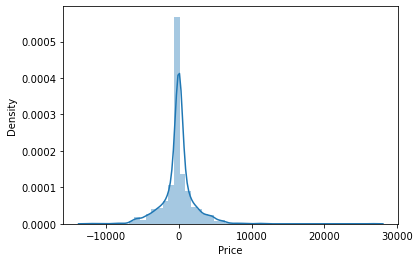

In [795]:
model_predict(DecisionTreeRegressor())

Model used is     :  DecisionTreeRegressor(max_depth=12)
	
Training R2 score :  0.92
Training MAE      :  871.44
Training MSE      :  1795473.53
Training RMSE     :  1339.9528088705215
	
Test R2 score     :  0.81
Test MAE          :  1211.94
Test MSE          :  4104772.75
Test RMSE         :  2026.0238769570312
Predictions: [16138.3         7546.375       8426.         ...  7174.
 12404.76315789 11319.94444444]


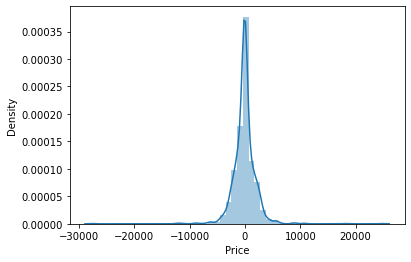

In [796]:
model_predict(DecisionTreeRegressor(max_depth = 12))

In [808]:
model_prediction(RandomForestRegressor())

Model used is     :  RandomForestRegressor()
	
Training R2 score :  0.96
Training MAE      :  562.34
Training MSE      :  952469.9
Training RMSE     :  975.945643978188
Test MAE          :  1146.99
Test MSE          :  3523081.56
Test RMSE         :  1876.9873627704583


'Test R2 score         :  0.96'

In [809]:
model_prediction(RandomForestRegressor(n_estimators=400,min_samples_split=10,min_samples_leaf=2))

Model used is     :  RandomForestRegressor(min_samples_leaf=2, min_samples_split=10,
                      n_estimators=400)
	
Training R2 score :  0.91
Training MAE      :  804.33
Training MSE      :  1829822.5
Training RMSE     :  1352.7093183681407
Test MAE          :  1105.77
Test MSE          :  3147717.45
Test RMSE         :  1774.1807827839868


'Test R2 score         :  0.96'

Model used is     :  LinearRegression()
	
Training R2 score :  0.7
Training MAE      :  1745.53
Training MSE      :  6258180.17
Training RMSE     :  2501.6354990285854
	
Test R2 score     :  0.7
Test MAE          :  1804.05
Test MSE          :  6366282.75
Test RMSE         :  2523.149371321484
Predictions: [14241.44470373  8655.00528049  9382.89324275 ...  5835.67044211
 12362.85672233 11172.44255115]


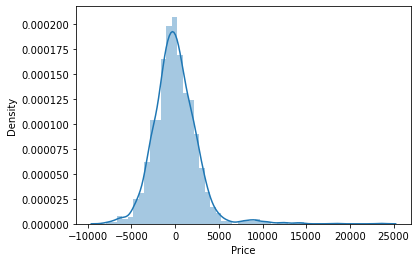

In [767]:
model_predict(LinearRegression())

In [768]:
model_predictions_test(RandomForestRegressor(n_estimators=400,min_samples_split=10,min_samples_leaf=2))

Model used is     :  RandomForestRegressor(min_samples_leaf=2, min_samples_split=10,
                      n_estimators=400)
	
        Actual     Predicted
6075   16655.0  16537.303666
3544    4959.0   5893.519954
9291    9187.0   8589.922571
5032    3858.0   3687.422707
2483   12898.0  15068.801746
9894   10529.0  10301.753039
346    16079.0  13974.325777
6365    7229.0   6145.271337
7624   10844.0  13466.609116
3393   16289.0  14315.060059
5412    3943.0   3979.598316
8778    8371.0   9072.144241
9259   14815.0  15153.849996
7932    3841.0   3863.346704
967     5126.0   6166.244312
10502   2754.0   2974.330573
6794    4174.0   4218.326312
2391    6171.0   6250.989828
4185   15809.0  15808.562610
8475    8452.0   8506.927245
960     2175.0   2711.211644
2507    4823.0   4593.732130
3422    7608.0   5598.496401
6498    5613.0   5548.831177
7303   15812.0  18705.746502
2848    5406.0   5612.758899
3889    3100.0   3317.762876
4193   13014.0  12041.882914
9662    4995.0   6831.029255
465